In [1]:
import numpy as np
import pandas as pd
# library for splitting training-testing
from sklearn.model_selection import train_test_split
# library for classification
from sklearn.metrics import accuracy_score

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from verstack import LGBMTuner

/home/jindalmadhur26/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
2022-09-30 15:56:24.332277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-30 15:56:24.332328: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
x_train = pd.read_csv("Data/train_allx.csv")
x_test = pd.read_csv("Data/val_allx.csv")
x_train.drop('ID', axis=1 , inplace=True)
x_test.drop('ID', axis=1 , inplace=True)

# x_train = pd.read_csv("Data/train_x_null<50_notImputed.csv")
# x_test = pd.read_csv("Data/test_x_null<50_notImputed.csv")

# x_train = pd.read_csv("Data/train__mean_mode_Imputed.csv")
# x_test = pd.read_csv("Data/test__mean_mode_Imputed.csv")

y_train = pd.read_csv("Data/train_y.csv")
y_test = pd.read_csv("Data/Sample_Output.csv", names = ['ID', 'Target'], header=None)

In [8]:
x_train = pd.get_dummies(x_train, columns=["D_36", "D_44"], prefix=["D_36", "D_44"], 
               drop_first=True, dummy_na=True)

x_test = pd.get_dummies(x_test, columns=["D_36", "D_44"], prefix=["D_36", "D_44"], 
               drop_first=True, dummy_na=True)

# LightGBM

In [9]:
categorical_feats = x_train.select_dtypes('object').columns.tolist()
for c in categorical_feats:
    x_train[c] = x_train[c].astype('category')
#     x_val[c] = x_val[c].astype('category')
    x_test[c] = x_test[c].astype('category')

In [10]:
import lightgbm as lgb
print ('Training lightgbm')

# money
params = {
          "objective" : "multiclass",
          "num_class" : 4,
          "num_leaves" : 100,
          "max_depth": 8,
          "learning_rate" : 0.01,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1,
          "metric" : ['auc_mu', 'multi_logloss'],
          "min_data_in_leaf" : 5000,
#           'categorical_feature' : x_train.select_dtypes('object').columns.tolist(),
#             'boosting' : 'dart',
            'num_threads' : 8,
#             'xgboost_dart_mode' : True,
            'is_unbalance' : True,
#             'class_weight' : 'balanced',
            'n_estimators' : 500
}

Training lightgbm



 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 10 trials
     .. Evaluation metric: accuracy 
     .. Study direction: minimize log_loss

     . Trial number: 0 finished
     .. Optimization score (lower-better): log_loss: 0.4553142507348004
     .. Evaluation score (greater-better): accuracy: 0.8157396996400212
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): log_loss: 0.45256106569941357
     .. Evaluation score (greater-better): accuracy: 0.8146240270550602
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): log_loss: 0.44786225240591676
     .. Evaluation score (greater-better): accuracy: 0.8182063819958336
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): log_loss: 0.

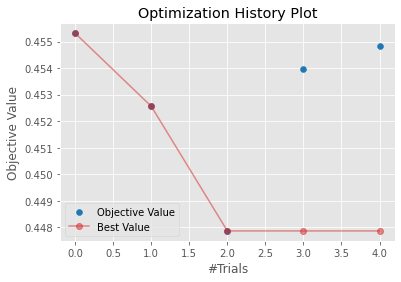

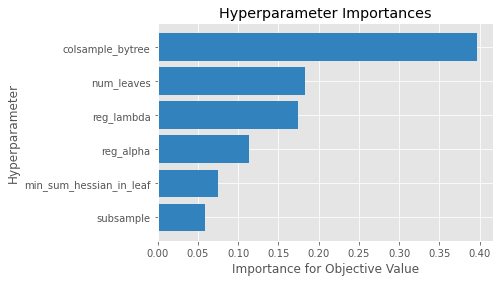

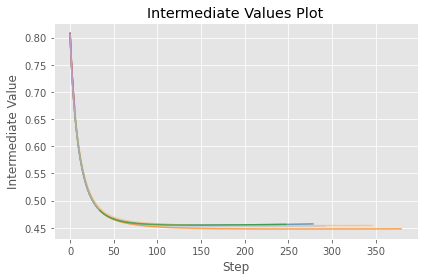

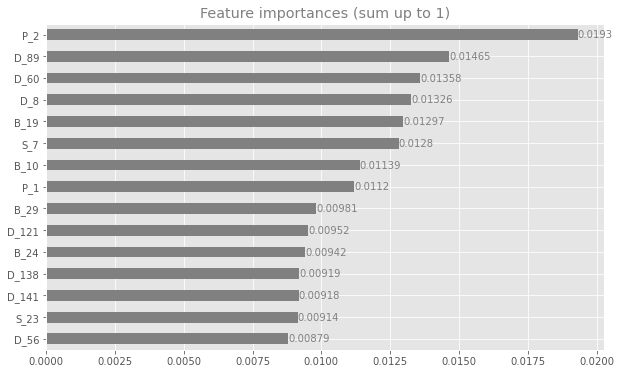


     . Optuna hyperparameters optimization finished
     .. Best trial number: 2    |     log_loss:          0.44786225240591676
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  292   |     multi_logloss:          0.45157565714036213

Time elapsed for fit execution: 35 min 16.05 sec


In [11]:
tuner = LGBMTuner(metric='accuracy', trials=10, )
tuner.fit(x_train, y_train['Default_Flag'])

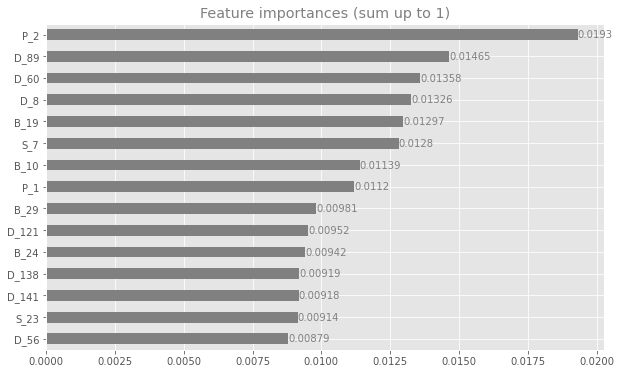

In [12]:
tuner.plot_importances()

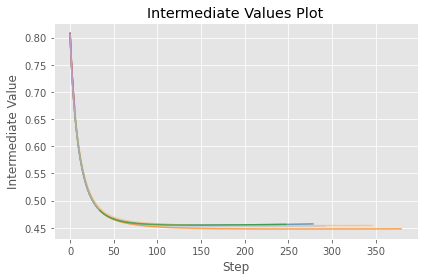

In [13]:
tuner.plot_intermediate_values()

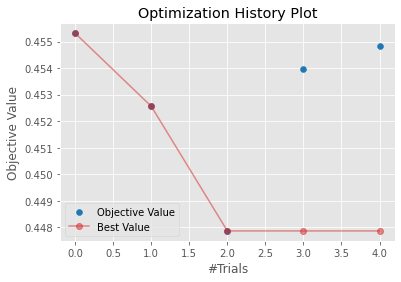

In [14]:
tuner.plot_optimization_history()

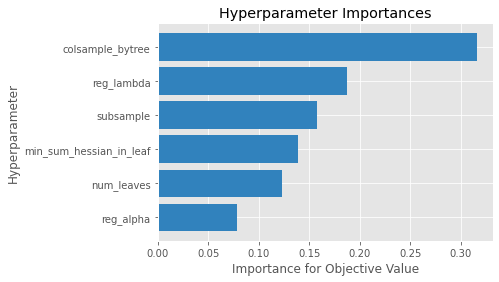

In [15]:
tuner.plot_param_importances()

In [16]:
tuner.init_params

{'task': 'train',
 'learning_rate': 0.05,
 'num_leaves': 244,
 'colsample_bytree': 0.7,
 'subsample': 0.7,
 'bagging_freq': 1,
 'max_depth': -1,
 'verbosity': -1,
 'reg_alpha': 1,
 'reg_lambda': 0.0,
 'min_split_gain': 0.0,
 'zero_as_missing': False,
 'max_bin': 255,
 'min_data_in_bin': 3,
 'n_estimators': 2000,
 'early_stopping_rounds': 100,
 'random_state': 42,
 'num_classes': 4,
 'objective': 'multiclass',
 'metric': 'multi_logloss',
 'num_threads': 6}

In [17]:
tuner.best_params

{'task': 'train',
 'learning_rate': 0.05,
 'num_leaves': 66,
 'colsample_bytree': 0.9162213204002109,
 'subsample': 0.5909124836035503,
 'bagging_freq': 1,
 'max_depth': -1,
 'verbosity': -1,
 'reg_alpha': 5.472429642032198e-06,
 'reg_lambda': 0.00052821153945323,
 'min_split_gain': 0.0,
 'zero_as_missing': False,
 'max_bin': 255,
 'min_data_in_bin': 3,
 'random_state': 42,
 'num_classes': 4,
 'objective': 'multiclass',
 'metric': 'multi_logloss',
 'num_threads': 6,
 'min_sum_hessian_in_leaf': 0.00541524411940254,
 'n_estimators': 292}